<a href="https://colab.research.google.com/github/sppu33/DSBDAL/blob/main/dsbdal8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# import kagglehub
# dataset_path=kagglehub.dataset_download('vikrishnan/boston-house-prices')

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler


In [32]:
df=pd.read_csv('boston_housing.csv')

In [33]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [35]:
df.dropna(inplace=True)

In [36]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


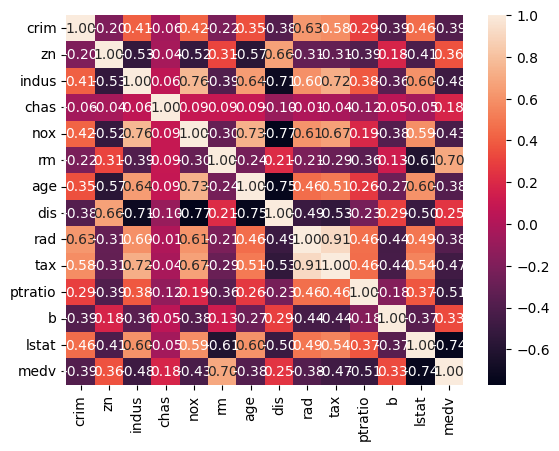

In [38]:
correlation_matrix=sns.heatmap(df.corr(), annot=True,fmt=".2f")

Columns:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [39]:
# we can see the medv value has less correlation with b, dist, chas so drop the columns

df.drop(['b','dis','chas'], axis=1, inplace=True)

In [40]:
df.head()

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,5.33,36.2


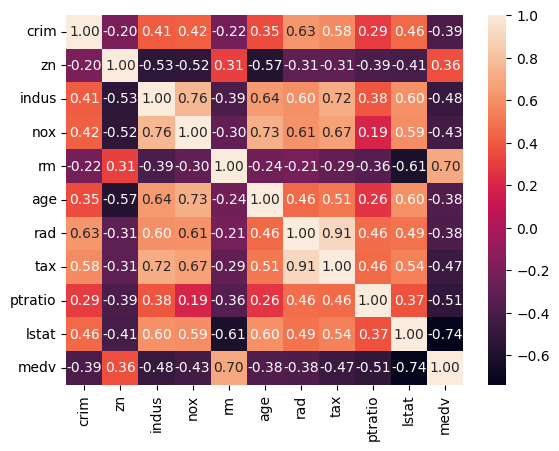

In [41]:
new_correlation_matrix=sns.heatmap(df.corr(),annot=True,fmt=".2f")

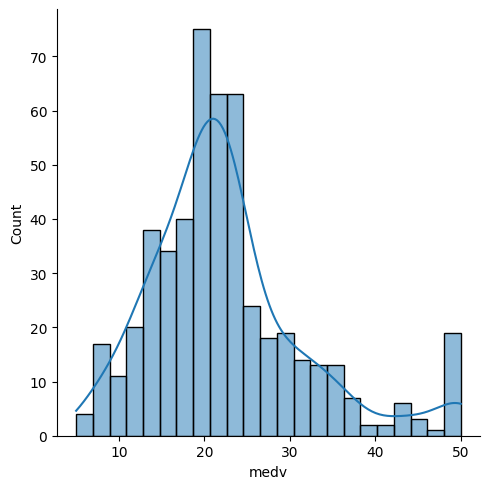

In [42]:
sns.displot(data=df.medv,kde=True)

In [43]:
X=np.asarray(df.drop(["medv"],axis=1))
y=np.asarray(df["medv"])
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [44]:
model=LinearRegression()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred=model.predict(X_test)

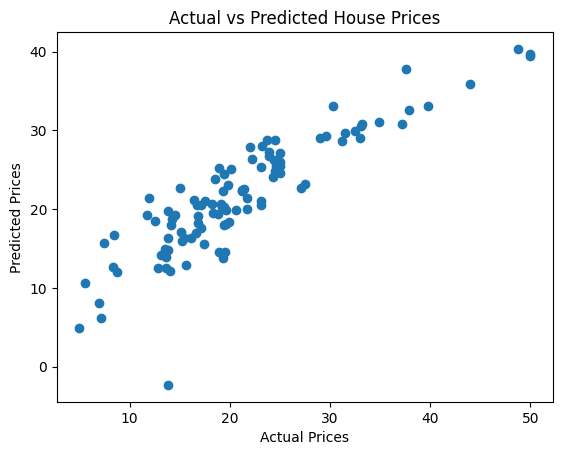

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [47]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ",r2_score(y_test,y_pred))

RMSE:  4.284290389234473
R2:  0.7791513299629143
